<a href="https://colab.research.google.com/github/yenngocduong/Audio-Analysis/blob/main/Mel_spectrogram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

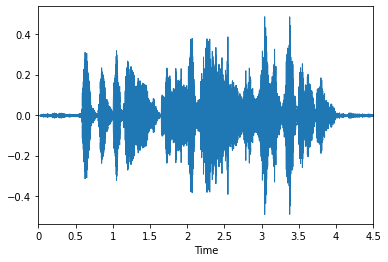

In [2]:
import librosa
import librosa.display

filename = 'signal.wav'
y, sr = librosa.load(filename)
# trim silent edges
whale_song, _ = librosa.effects.trim(y)
librosa.display.waveplot(whale_song, sr=sr);

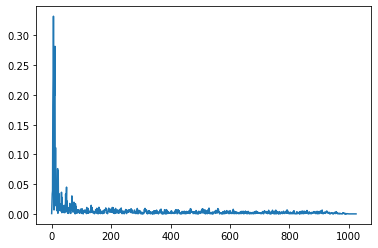

In [3]:
import numpy as np
import matplotlib.pyplot as plt

n_fft = 2048
D = np.abs(librosa.stft(whale_song[:n_fft], n_fft=n_fft, hop_length=n_fft+1))
plt.plot(D);

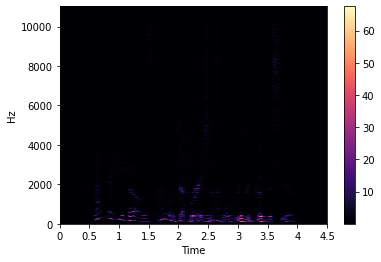

In [4]:
hop_length = 512
D = np.abs(librosa.stft(whale_song, n_fft=n_fft,  hop_length=hop_length))
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='linear');
plt.colorbar();

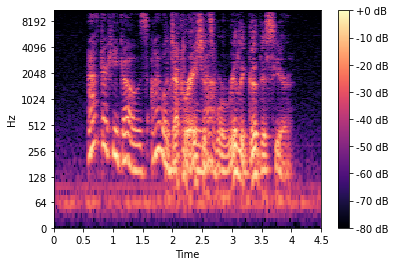

In [5]:
DB = librosa.amplitude_to_db(D, ref=np.max)
librosa.display.specshow(DB, sr=sr, hop_length=hop_length, x_axis='time', y_axis='log');
plt.colorbar(format='%+2.0f dB');

In [6]:
n_mels = 128
mel = librosa.filters.mel(sr=sr, n_fft=n_fft, n_mels=n_mels)

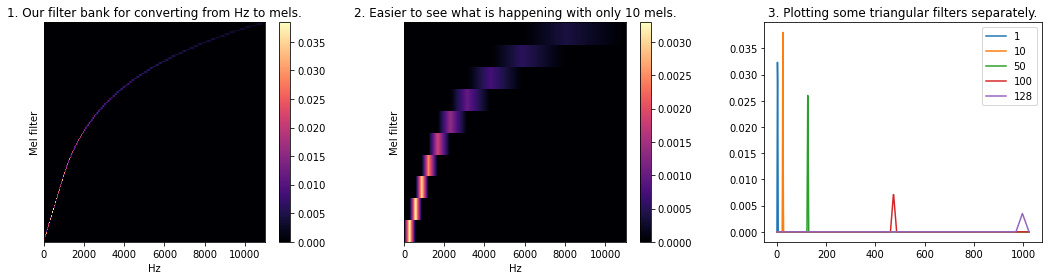

In [7]:
plt.figure(figsize=(15, 4));

plt.subplot(1, 3, 1);
librosa.display.specshow(mel, sr=sr, hop_length=hop_length, x_axis='linear');
plt.ylabel('Mel filter');
plt.colorbar();
plt.title('1. Our filter bank for converting from Hz to mels.');

plt.subplot(1, 3, 2);
mel_10 = librosa.filters.mel(sr=sr, n_fft=n_fft, n_mels=10)
librosa.display.specshow(mel_10, sr=sr, hop_length=hop_length, x_axis='linear');
plt.ylabel('Mel filter');
plt.colorbar();
plt.title('2. Easier to see what is happening with only 10 mels.');

plt.subplot(1, 3, 3);
idxs_to_plot = [0, 9, 49, 99, 127]
for i in idxs_to_plot:
    plt.plot(mel[i]);
plt.legend(labels=[f'{i+1}' for i in idxs_to_plot]);
plt.title('3. Plotting some triangular filters separately.');

plt.tight_layout();

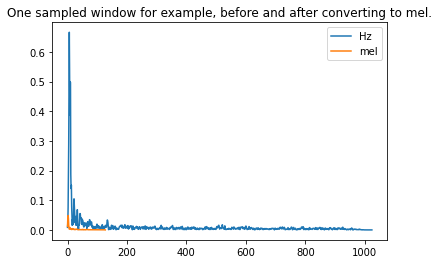

In [8]:
plt.plot(D[:, 1]);
plt.plot(mel.dot(D[:, 1]));
plt.legend(labels=['Hz', 'mel']);
plt.title('One sampled window for example, before and after converting to mel.');

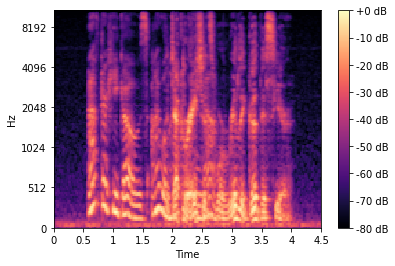

In [9]:
S = librosa.feature.melspectrogram(whale_song, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)
S_DB = librosa.power_to_db(S, ref=np.max)
librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel');
plt.colorbar(format='%+2.0f dB');

### **MFCC**

In [10]:
y, sr = librosa.load('signal.wav')
librosa.feature.mfcc(y=y, sr=sr)

array([[-5.9023810e+02, -5.5325940e+02, -5.2837848e+02, ...,
        -5.2511310e+02, -5.2565973e+02, -5.5180182e+02],
       [ 4.8247398e+01,  7.0352989e+01,  7.4571167e+01, ...,
         7.4346344e+01,  7.8120255e+01,  7.2650085e+01],
       [ 3.6840294e+01,  3.2761765e+01,  3.1470757e+01, ...,
         2.9309597e+01,  2.9946907e+01,  3.4945869e+01],
       ...,
       [ 2.7463620e+00,  3.5830550e+00,  4.1268330e+00, ...,
         8.1573544e+00,  1.0788008e+01,  1.3006086e+01],
       [ 4.2347729e-01,  4.6124935e-01,  7.3896062e-01, ...,
         8.3106146e+00,  9.6343327e+00,  9.8202209e+00],
       [-1.4087530e+00,  2.0240555e+00,  4.8388309e+00, ...,
        -1.7231824e-01,  2.6904154e+00,  5.1669482e-02]], dtype=float32)

In [11]:
A = librosa.feature.mfcc(y=y, sr=sr, hop_length=1024, htk=True)
A

array([[-5.8730786e+02, -5.2167847e+02, -5.1698541e+02, ...,
        -5.1777014e+02, -5.2128979e+02, -5.1930365e+02],
       [ 6.1279472e+01,  8.6894203e+01,  8.7306358e+01, ...,
         9.3769073e+01,  8.1922417e+01,  9.0196487e+01],
       [ 4.4985695e+01,  3.7932751e+01,  4.0221985e+01, ...,
         4.2232471e+01,  3.6348354e+01,  3.7599361e+01],
       ...,
       [-3.9048352e+00, -5.0054021e+00, -6.0966392e+00, ...,
        -3.4782400e+00, -1.7719675e+00, -5.3478227e+00],
       [-6.5395894e+00, -6.6196318e+00, -2.6542356e+00, ...,
        -3.6181347e+00, -2.0211205e-01, -3.2246952e+00],
       [-6.2334690e+00, -6.0733624e+00, -6.8103285e+00, ...,
        -7.7689309e+00, -2.8162186e+00, -8.8810043e+00]], dtype=float32)

In [12]:
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)
S_mfcc = librosa.feature.mfcc(S=librosa.power_to_db(S))
S_mfcc

array([[-585.6922    , -545.7768    , -519.2851    , ..., -516.37164   ,
        -516.81415   , -544.21643   ],
       [  50.319168  ,   70.58336   ,   72.97569   , ...,   72.88525   ,
          76.594986  ,   73.18566   ],
       [  36.954796  ,   33.06594   ,   34.862915  , ...,   32.468285  ,
          31.55877   ,   35.440674  ],
       ...,
       [  -0.95999366,    1.3115221 ,    3.2178268 , ...,    0.76853716,
           4.3342705 ,    1.8954482 ],
       [  -3.0359378 ,    2.2603443 ,    5.3985624 , ...,    1.6168547 ,
           1.305842  ,   -4.5477715 ],
       [  -4.879039  ,   -5.3448153 ,   -3.419079  , ...,    2.7027333 ,
          -0.8844461 ,   -4.3805437 ]], dtype=float32)

(20, 97)

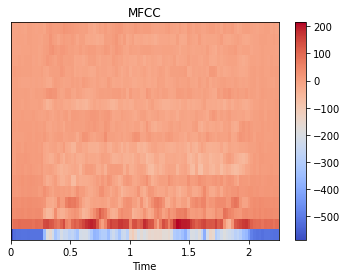

In [13]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
img = librosa.display.specshow(A, x_axis='time', ax=ax)
fig.colorbar(img, ax=ax)
ax.set(title='MFCC')
A.shape

(20, 194)

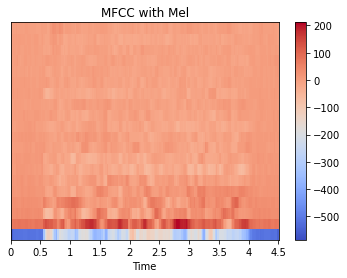

In [14]:
fig, ax = plt.subplots()
img = librosa.display.specshow(S_mfcc, x_axis='time', ax=ax)
fig.colorbar(img, ax=ax)
ax.set(title='MFCC with Mel')
S_mfcc.shape

___
